<a href="https://colab.research.google.com/github/VindaShinde/DonorBrain/blob/master/SVM_intro_and_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines

SVMs use: **Maximum Margin Classification**, which is easier to show with a some plots.

$~$

---

In [ ]:
from sklearn import datasets

X,y = datasets.load_iris(return_X_y=True)

Consider two **Logistic Regressions** with these two decision boundaries.

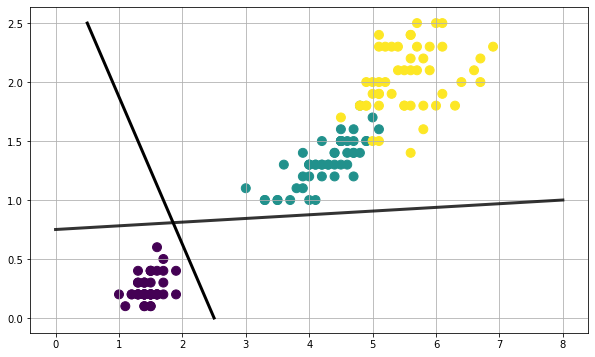

In [ ]:
plt.figure(figsize=(10,6))
plt.grid()
plt.scatter(X[:,2],X[:,3],c=y, s=80)
plt.plot([2.5, 0.5],[0,2.5],'k-',linewidth=3)
plt.plot([0,8],[0.75,1],'k-', linewidth=3, alpha=0.8)

Both are equally valid models, which minimize the *Logistic Cost* function (also known as the ***Cross-Entropy Loss***).

#### Both of these "models" have the same value of $f(X,y,{\bf w})$ with very different model parameters, $\bf w$.

---

$~$

## The Support Vector Machine

Below, we see the approach of the *Support Vector Machine* which finds the decision boundary ${\bf w \cdot x} = 0$.
This is much like the *Logistic Regression* method.

However, the SVM adds an addition: it chooses the decision boundary (DB) which *maximizes the margin* on opposite sides of the DB between two classes shown. This is one way to define the "best" DB.

#### SVD ***maximizes the margin between groups***.

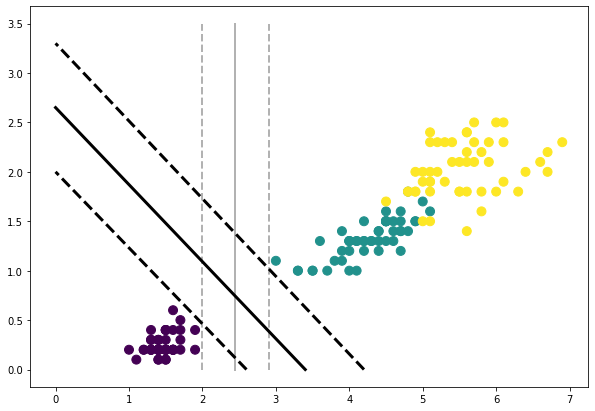

In [ ]:
plt.figure(figsize=(10,7))
#plt.grid()
plt.scatter(X[:,2],X[:,3],c=y, s=80)
plt.plot([2.6, 0.],[0, 2],'k--',linewidth=3)
plt.plot([4.2, 0],[0, 3.3],'k--',linewidth=3)
plt.plot([3.4, 0.],[0, 2.65],'k-',linewidth=3)

plt.plot([2, 2],[0, 3.5],'k--',linewidth=2, alpha=0.3)
plt.plot([2.9, 2.9],[0, 3.5],'k--',linewidth=2, alpha=0.3)
plt.plot([2.45, 2.45],[0, 3.5],'k-',linewidth=2, alpha=0.3)


---

### Let's make an **SVM** model.

In [ ]:
X2 = iris.data[:,[2,3]]
y = iris.target

In [ ]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.25, random_state=111, stratify=y)

#### Make an SVM instance, fit, and validate the model.

In [ ]:
from sklearn.svm import SVC

svm = SVC(random_state=1,verbose=True)

svm.fit(X2_train, y_train)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=True)

Test: **Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = svm.predict(X2_test)

In [ ]:
accuracy_score(y_pred, y_test)

0.9736842105263158

or "by hand"

In [ ]:
(svm.predict(X2_test) == y_test).sum()/len(y_test)

0.9736842105263158

Not bad!

---

### The SVM Decision Boundaries

I need this function from Raschka's book

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

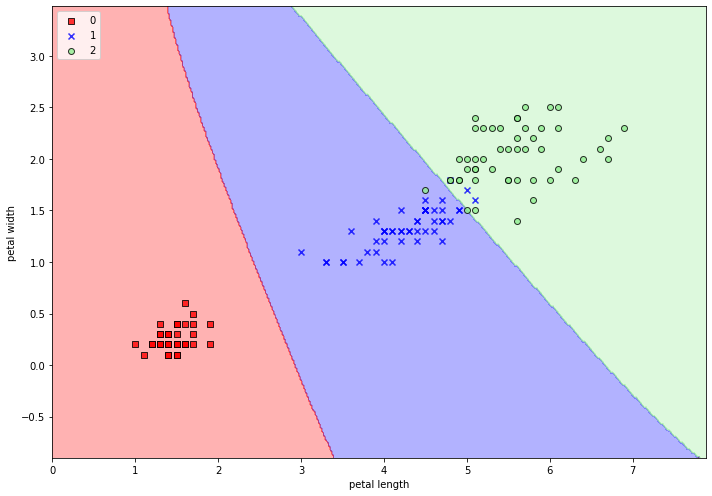

In [ ]:
plot_decision_regions(X2, y, classifier=svm) #, test_idx=range(105, 150))

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_11.png', dpi=300)
#plt.show()

Note that the `scikit-learn` **SVM()** implementation automatically handles multi-class problems without any fuss.


---

$~$

$~$


## SVM versus Logistic Regression

Let's generate some binary-class data.

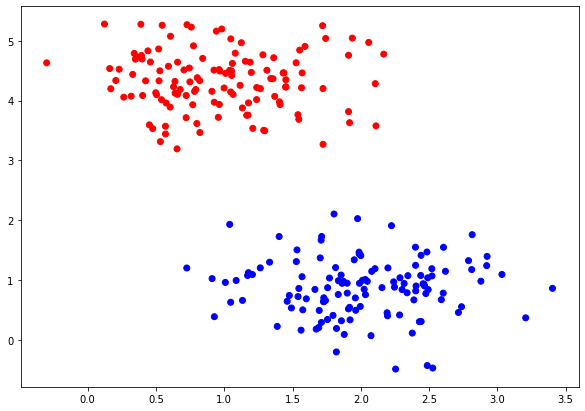

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import colors

X, y = make_blobs(n_samples=250, centers=2, random_state=0, cluster_std=0.50)

#plt.figure(figsize=(10,10))
mycmap = colors.ListedColormap(['red', 'blue'])
plt.scatter(X[:,0], X[:,1], c=y, cmap=mycmap)

### SVM

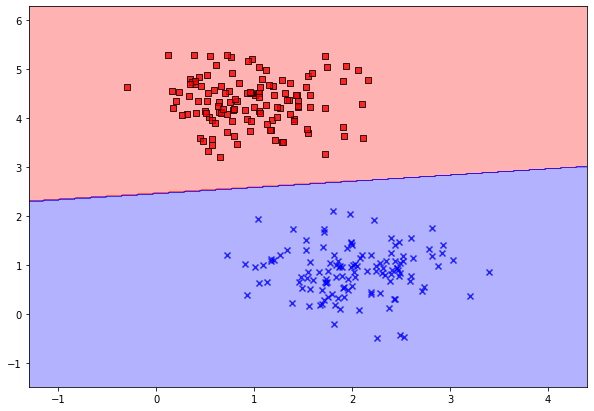

In [ ]:
svm = SVC(kernel='linear', C=1, random_state=1)
modelsvm = svm.fit(X, y)

plot_decision_regions(X, y, classifier=svm)

### Logistic Regression

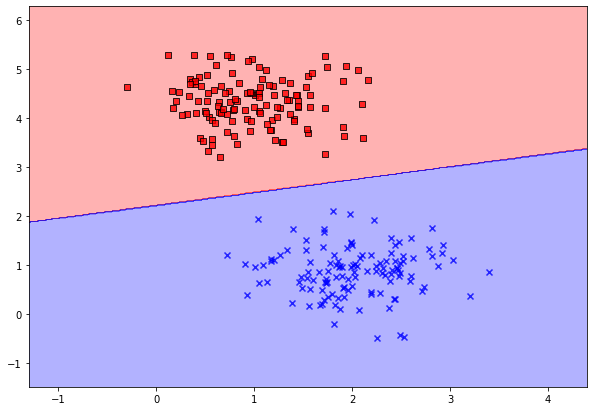

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1)
modellr = logreg.fit(X, y)

plot_decision_regions(X, y, classifier=logreg)

Similar, but notice that the **SVM** is a little more "equidistant" from the data near the decision boundary.

---

# Outliers

Let's add some outliers.

Add five points near (4,-1) with $\sigma = 0.2$.

In [ ]:
np.random.seed(500)

X_outliers = np.r_[ X, np.random.multivariate_normal([4,-1], [[0.2, 0],[0,0.2]], size=5) ]

Add *Class 0* for these points to `y`

In [ ]:
y_outliers = np.append(y, np.zeros(5))

In [ ]:
len(X_outliers)

255

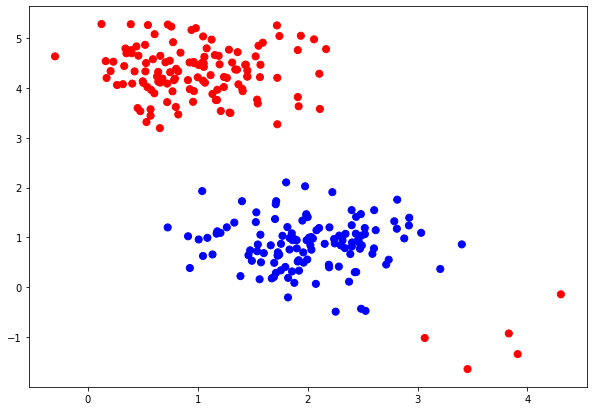

In [ ]:
mycmap = colors.ListedColormap(['red', 'blue'])
plt.scatter(X_outliers[:,0], X_outliers[:,1], c=y_outliers, s=50, cmap=mycmap)
#plt.scatter(X_outliers[-5:,0], X_outliers[-5:,1], c=y_outliers[-5:], s=100, cmap=mycmap)


### SVM and outliers

**Original: no outliers**

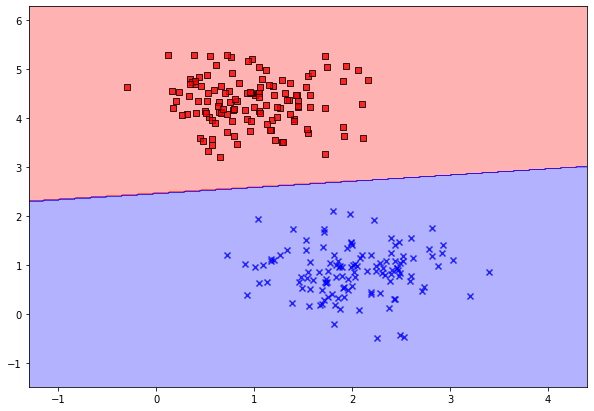

In [ ]:
svm = SVC(kernel='linear', C=1, random_state=1)
modelsvm = svm.fit(X, y)

plot_decision_regions(X, y, classifier=svm)

**With outliers**

Text(3, 2.9, 'Previous SVM Decision Boundary')

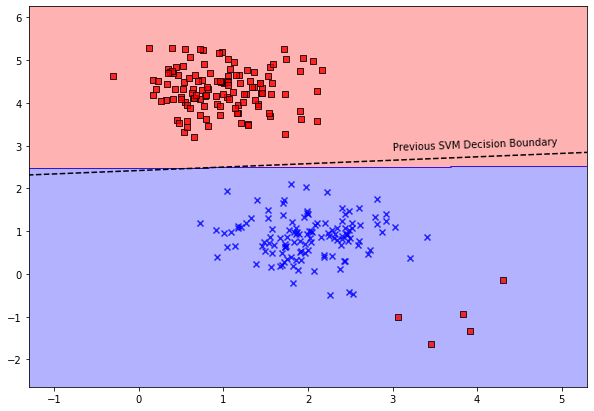

In [ ]:
svm = SVC(kernel='linear', C=1, random_state=1)
modelsvm = svm.fit(X_outliers, y_outliers)

plot_decision_regions(X_outliers, y_outliers, classifier=svm)
plt.plot([-1.5,6], [2.3,2.9], 'k--')
plt.text(3,2.9,"Previous SVM Decision Boundary", rotation=2)

**Not much change in the SVM decision boundary**.

---

### Logistic Regression and Outliers

Text(3, 3.02, 'Previous LR Decision Boundary')

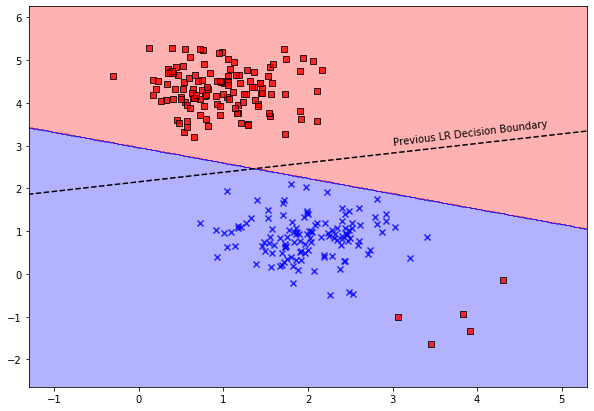

In [ ]:
modellr = logreg.fit(X_outliers, y_outliers)
plot_decision_regions(X_outliers, y_outliers, classifier=modellr)

plt.plot([-1.5,6], [1.82,3.5], 'k--')
plt.text(3,3.02,"Previous LR Decision Boundary", rotation=7)

**The Logistic Regression boundary is** ***significantly*** **changed**.

### $~~~\Rightarrow$  SVM *is less sensitive to Outliers*